In [682]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# Leitura da base de dados

dados = pd.read_csv("https://github.com/pietro0803/Base-de-dados-/raw/main/Dados%20vendas%20Koelles.csv",encoding='latin1', delimiter=';')
#encoding='latin1', delimiter=';'
# Visualização inicial dos dados
dados.head()



,MES,DATA,CLIENTE,MODELO,COR,TIPO,COR2,ALCA,ZiPER,VALOR (R$),VALOR (USD),FRETE (R$),CANAL DE VENDA,PAGAMENTO,CIDADE,ESTADO
0,1,02/01/2024,Leonardo Guerra Maio Ribeiro,Wallow,Original Bege,Original 2021,Vinho,Marrom,0,650,"130,36",50.0,Shopify,dLocal,Rio de Janeiro,RJ
1,1,04/01/2024,Luiza Figueiredo,Wallow,Original Rosa,Toujours Asas,Dourado / Rosa Choque,Dourado,0,530,"107,07",35.0,Shopify,Stripe,So Paulo,SP
2,1,05/01/2024,Marcelo Marques Roncaglia,Nuna,Marant Rosa,Estrela,Vermelho,Vermelho,1,540,"109,09",35.0,Shopify,Stripe,So Paulo,SP
3,1,07/01/2024,Andre Giacchetta,Wallow,Original Laranja,Estrela,Branco / Prata,Marrom,1,560,"113,59",35.0,Shopify,Stripe,So Paulo,SP
4,1,08/01/2024,Sofia Segatto da Costa Campos,Nuna,Marant Verde,Koelles 2023,Dourado,Marrom,1,530,"108,83",60.0,Shopify,Stripe,Braslia,DF


In [683]:
dados= dados.dropna()
dados

,MES,DATA,CLIENTE,MODELO,COR,TIPO,COR2,ALCA,ZiPER,VALOR (R$),VALOR (USD),FRETE (R$),CANAL DE VENDA,PAGAMENTO,CIDADE,ESTADO
0,1,02/01/2024,Leonardo Guerra Maio Ribeiro,Wallow,Original Bege,Original 2021,Vinho,Marrom,0,650,"130,36",50.0,Shopify,dLocal,Rio de Janeiro,RJ
1,1,04/01/2024,Luiza Figueiredo,Wallow,Original Rosa,Toujours Asas,Dourado / Rosa Choque,Dourado,0,530,"107,07",35.0,Shopify,Stripe,So Paulo,SP
2,1,05/01/2024,Marcelo Marques Roncaglia,Nuna,Marant Rosa,Estrela,Vermelho,Vermelho,1,540,"109,09",35.0,Shopify,Stripe,So Paulo,SP
3,1,07/01/2024,Andre Giacchetta,Wallow,Original Laranja,Estrela,Branco / Prata,Marrom,1,560,"113,59",35.0,Shopify,Stripe,So Paulo,SP
4,1,08/01/2024,Sofia Segatto da Costa Campos,Nuna,Marant Verde,Koelles 2023,Dourado,Marrom,1,530,"108,83",60.0,Shopify,Stripe,Braslia,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4,10/04/2024,Luiz Carlos Bueno Ferreira Junior Ferreira,Nuna,Jeans Claro,Estrela,Dourado e branco,Marrom,1,570,"113,29",35.0,Shopify,Stripe,So Paulo,SP
99,4,11/04/2024,Luiz Antonio Capasso,Nuna,Bege,Bag Atelier 2023,Vinho,Vermelho,1,570,"118,84",35.0,WhatsApp,Pix (Nubank),So Paulo,SP
100,4,12/04/2024,Enzo Gimenez,Wallow,Original Amarelo,Original 2021,Pssego,Amarelo,1,560,"108,78",35.0,Shopify,Stripe,So Paulo,SP
101,4,12/04/2024,Carolina Glycerio,Wallow,Original Amarelo,Original 2022,Pssego,Off White,1,560,"108,78",35.0,Shopify,Stripe,So Paulo,SP


In [684]:
dados = dados.rename(columns={'VALOR (R$)': 'VALOR_RS', 'VALOR (USD)': 'VALOR_USD','FRETE (R$)': 'FRETE'})
dados

,MES,DATA,CLIENTE,MODELO,COR,TIPO,COR2,ALCA,ZiPER,VALOR_RS,VALOR_USD,FRETE,CANAL DE VENDA,PAGAMENTO,CIDADE,ESTADO
0,1,02/01/2024,Leonardo Guerra Maio Ribeiro,Wallow,Original Bege,Original 2021,Vinho,Marrom,0,650,"130,36",50.0,Shopify,dLocal,Rio de Janeiro,RJ
1,1,04/01/2024,Luiza Figueiredo,Wallow,Original Rosa,Toujours Asas,Dourado / Rosa Choque,Dourado,0,530,"107,07",35.0,Shopify,Stripe,So Paulo,SP
2,1,05/01/2024,Marcelo Marques Roncaglia,Nuna,Marant Rosa,Estrela,Vermelho,Vermelho,1,540,"109,09",35.0,Shopify,Stripe,So Paulo,SP
3,1,07/01/2024,Andre Giacchetta,Wallow,Original Laranja,Estrela,Branco / Prata,Marrom,1,560,"113,59",35.0,Shopify,Stripe,So Paulo,SP
4,1,08/01/2024,Sofia Segatto da Costa Campos,Nuna,Marant Verde,Koelles 2023,Dourado,Marrom,1,530,"108,83",60.0,Shopify,Stripe,Braslia,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4,10/04/2024,Luiz Carlos Bueno Ferreira Junior Ferreira,Nuna,Jeans Claro,Estrela,Dourado e branco,Marrom,1,570,"113,29",35.0,Shopify,Stripe,So Paulo,SP
99,4,11/04/2024,Luiz Antonio Capasso,Nuna,Bege,Bag Atelier 2023,Vinho,Vermelho,1,570,"118,84",35.0,WhatsApp,Pix (Nubank),So Paulo,SP
100,4,12/04/2024,Enzo Gimenez,Wallow,Original Amarelo,Original 2021,Pssego,Amarelo,1,560,"108,78",35.0,Shopify,Stripe,So Paulo,SP
101,4,12/04/2024,Carolina Glycerio,Wallow,Original Amarelo,Original 2022,Pssego,Off White,1,560,"108,78",35.0,Shopify,Stripe,So Paulo,SP


In [685]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MES             102 non-null    int64  
 1   DATA            102 non-null    object 
 2   CLIENTE         102 non-null    object 
 3   MODELO          102 non-null    object 
 4   COR             102 non-null    object 
 5   TIPO            102 non-null    object 
 6   COR2            102 non-null    object 
 7   ALCA            102 non-null    object 
 8   ZiPER           102 non-null    int64  
 9   VALOR_RS        102 non-null    int64  
 10  VALOR_USD       102 non-null    object 
 11  FRETE           102 non-null    float64
 12  CANAL DE VENDA  102 non-null    object 
 13  PAGAMENTO       102 non-null    object 
 14  CIDADE          102 non-null    object 
 15  ESTADO          102 non-null    object 
dtypes: float64(1), int64(3), object(12)
memory usage: 13.5+ KB


In [686]:
#COnvertendo Valor(USD) para float

dados['VALOR_USD']= dados['VALOR_USD'].str.replace(',','.')
dados['VALOR_USD']= dados['VALOR_USD'].astype(float)


In [687]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MES             102 non-null    int64  
 1   DATA            102 non-null    object 
 2   CLIENTE         102 non-null    object 
 3   MODELO          102 non-null    object 
 4   COR             102 non-null    object 
 5   TIPO            102 non-null    object 
 6   COR2            102 non-null    object 
 7   ALCA            102 non-null    object 
 8   ZiPER           102 non-null    int64  
 9   VALOR_RS        102 non-null    int64  
 10  VALOR_USD       102 non-null    float64
 11  FRETE           102 non-null    float64
 12  CANAL DE VENDA  102 non-null    object 
 13  PAGAMENTO       102 non-null    object 
 14  CIDADE          102 non-null    object 
 15  ESTADO          102 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 13.5+ KB


In [688]:
#dados.corr()

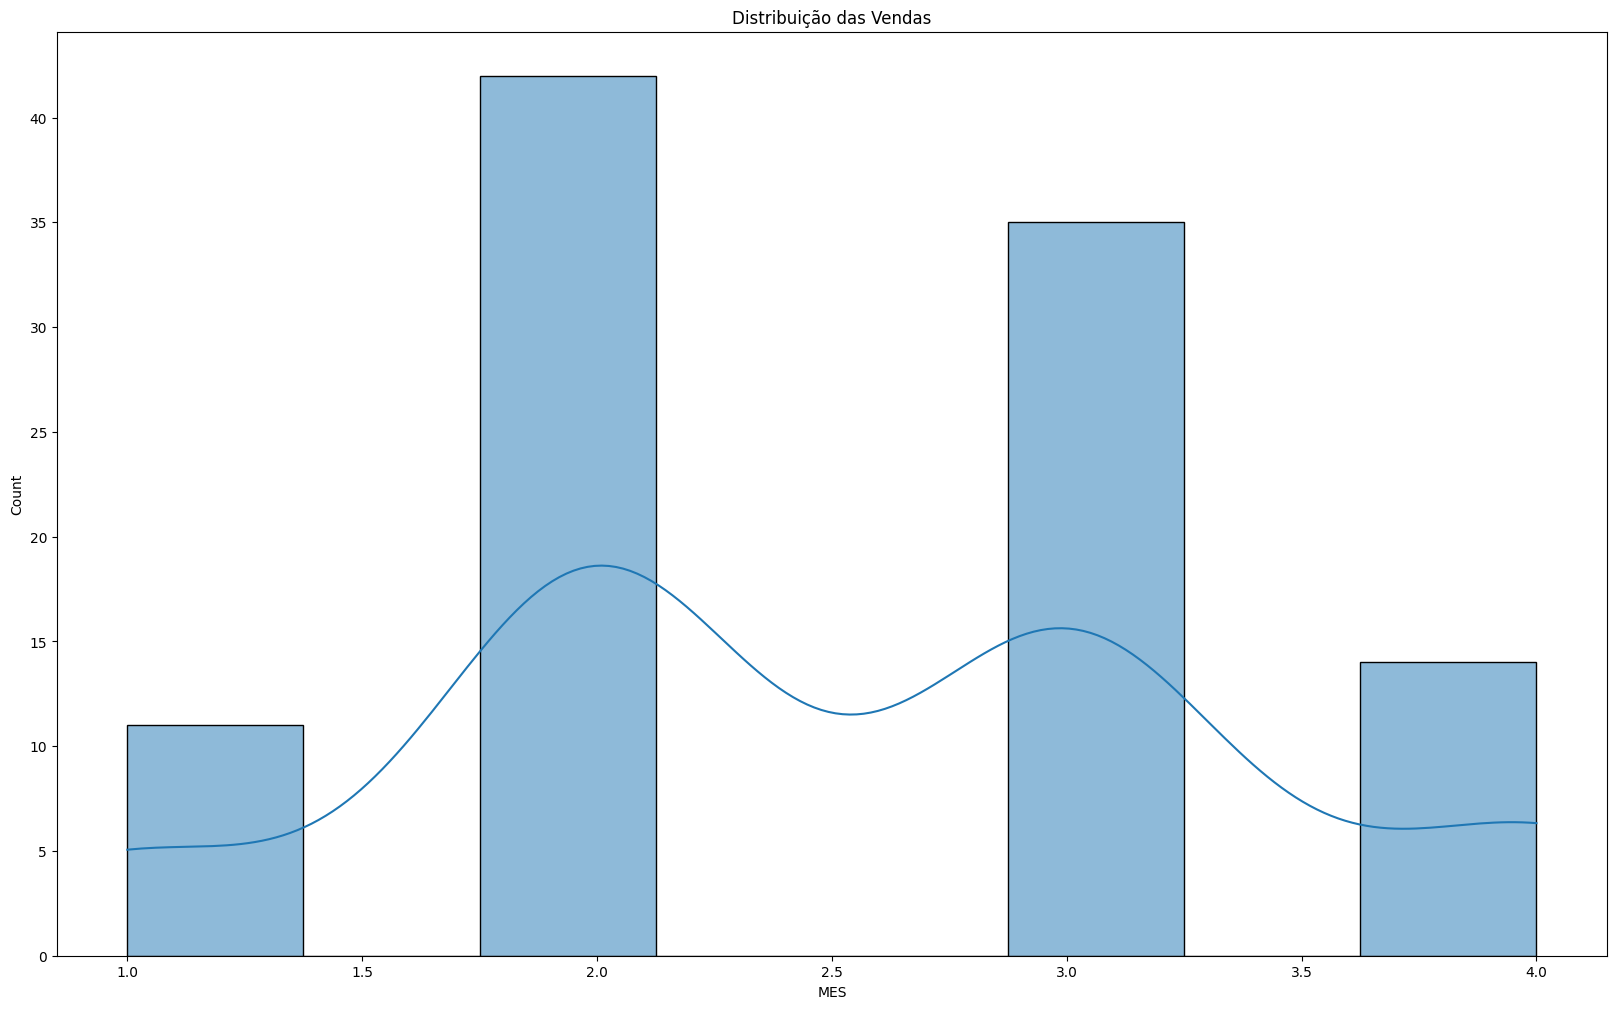

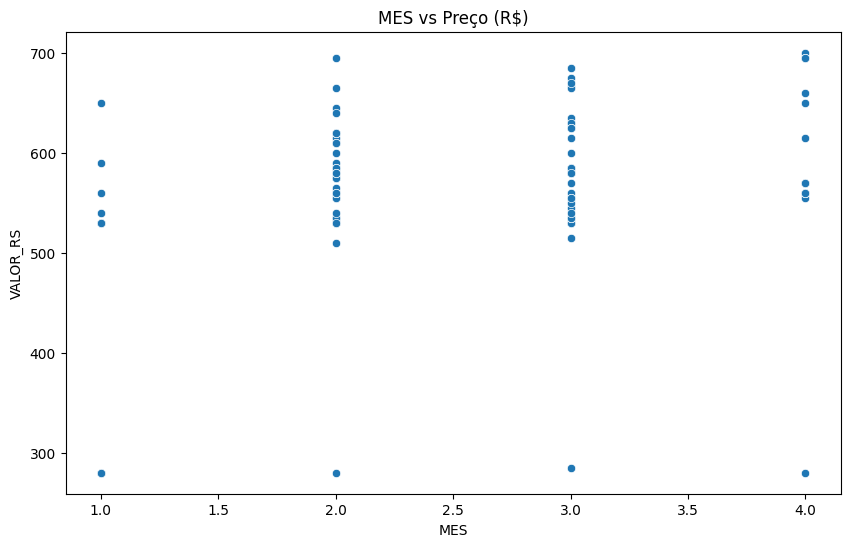

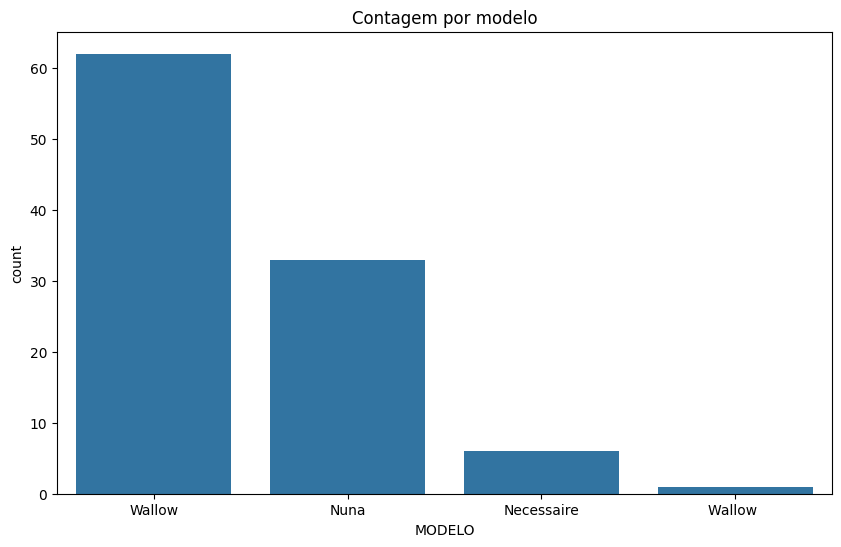

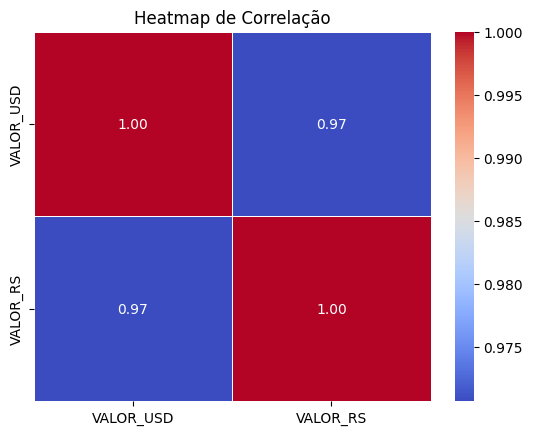

In [689]:
# Gráfico de distribuição das vendas
plt.figure(figsize=(20, 12))
sns.histplot(dados['MES'], kde=True)
plt.title('Distribuição das Vendas')
plt.show()

# Gráfico de dispersão das vendas por alguma outra variável (ex: preço)
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'MES', y='VALOR_RS', data=dados)
plt.title('MES vs Preço (R$)')
plt.show()

# Gráfico de barras para categorias (se existirem)
plt.figure(figsize=(10, 6))
sns.countplot(x='MODELO', data=dados)
plt.title('Contagem por modelo')
plt.show()
# Correlação
correlação = dados[['VALOR_USD', 'VALOR_RS']].corr()
correlação
sns.heatmap(correlação, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()


In [690]:
freq = dados['ESTADO'].value_counts()
freq

ESTADO
SP        75
RJ         4
MG         4
PR         4
DF         3
MT         3
SC         2
CE         2
Brasil     1
GO         1
MS         1
SE         1
PE         1
Name: count, dtype: int64

In [691]:
# Concatenar as variáveis dummy de volta ao dataframe original, removendo a coluna 'MODELO' original

#dados = pd.concat([dados, pd.get_dummies(dados['MODELO'], prefix='MODELO', drop_first=True)], axis=1)

#dados.drop(columns=['MODELO'], inplace=True)

# Exibir as primeiras linhas do dataframe resultante
#dados.head()


In [692]:
# Remover espaços extras nos valores da coluna "MODELO"
dados['MODELO'] = dados['MODELO'].str.strip()

# Remover vírgulas e converter a coluna 'VALOR (USD)' para float e depois para int
dados['VALOR_USD'] = dados['VALOR_USD'].astype(int)

#Converter a coluna 'FRETE' para float e depois para int

dados['FRETE'] = dados['FRETE'].astype(int)


# Criar variáveis dummy para a coluna "MODELO"
dummies = pd.get_dummies(dados['MODELO'], prefix='MODELO')

# Concatenar as variáveis dummy ao DataFrame original
dados= pd.concat([dados, dummies], axis=1)











In [693]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MES                102 non-null    int64 
 1   DATA               102 non-null    object
 2   CLIENTE            102 non-null    object
 3   MODELO             102 non-null    object
 4   COR                102 non-null    object
 5   TIPO               102 non-null    object
 6   COR2               102 non-null    object
 7   ALCA               102 non-null    object
 8   ZiPER              102 non-null    int64 
 9   VALOR_RS           102 non-null    int64 
 10  VALOR_USD          102 non-null    int64 
 11  FRETE              102 non-null    int64 
 12  CANAL DE VENDA     102 non-null    object
 13  PAGAMENTO          102 non-null    object
 14  CIDADE             102 non-null    object
 15  ESTADO             102 non-null    object
 16  MODELO_Necessaire  102 non-null    bool  
 17  MO

In [694]:
dados.head()

,MES,DATA,CLIENTE,MODELO,COR,TIPO,COR2,ALCA,ZiPER,VALOR_RS,VALOR_USD,FRETE,CANAL DE VENDA,PAGAMENTO,CIDADE,ESTADO,MODELO_Necessaire,MODELO_Nuna,MODELO_Wallow
0,1,02/01/2024,Leonardo Guerra Maio Ribeiro,Wallow,Original Bege,Original 2021,Vinho,Marrom,0,650,130,50,Shopify,dLocal,Rio de Janeiro,RJ,False,False,True
1,1,04/01/2024,Luiza Figueiredo,Wallow,Original Rosa,Toujours Asas,Dourado / Rosa Choque,Dourado,0,530,107,35,Shopify,Stripe,So Paulo,SP,False,False,True
2,1,05/01/2024,Marcelo Marques Roncaglia,Nuna,Marant Rosa,Estrela,Vermelho,Vermelho,1,540,109,35,Shopify,Stripe,So Paulo,SP,False,True,False
3,1,07/01/2024,Andre Giacchetta,Wallow,Original Laranja,Estrela,Branco / Prata,Marrom,1,560,113,35,Shopify,Stripe,So Paulo,SP,False,False,True
4,1,08/01/2024,Sofia Segatto da Costa Campos,Nuna,Marant Verde,Koelles 2023,Dourado,Marrom,1,530,108,60,Shopify,Stripe,Braslia,DF,False,True,False


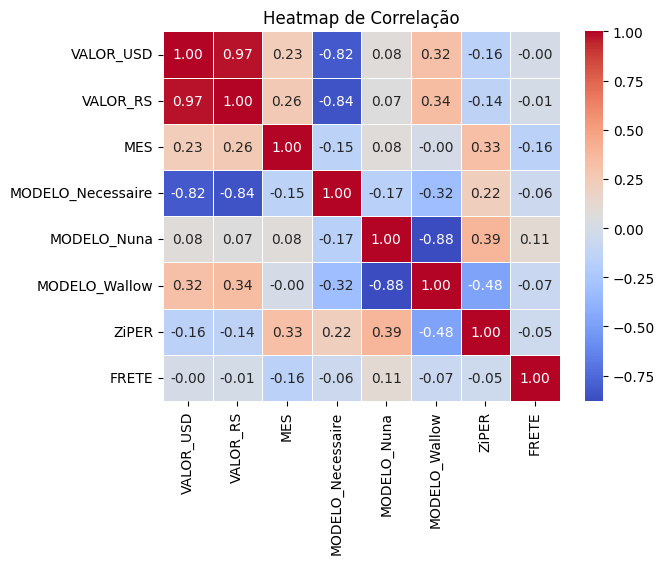

In [695]:
correlação_nova = dados[['VALOR_USD', 'VALOR_RS','MES','MODELO_Necessaire','MODELO_Nuna','MODELO_Wallow','ZiPER','FRETE']].corr()
correlação_nova
sns.heatmap(correlação_nova, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()

In [696]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

X = dados[['VALOR_USD', 'MODELO_Necessaire']]
y = dados['VALOR_RS']
#'ZiPER','MODELO_Nuna', 'MODELO_Wallow'

In [697]:
# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [698]:
X_train.shape

(71, 2)

In [699]:
X_test.shape

(31, 2)

In [700]:
# Criação e treinamento do modelo
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

LinearRegression()

In [701]:
intercept = modelo_linear.intercept_
print(intercept)

120.47943018744024


In [702]:
coef = modelo_linear.coef_
print(coef)

[  3.96810631 -62.69338381]


In [703]:
y_pred = modelo_linear.predict(X_test)


In [704]:
y_pred

array([541.09869955, 652.20567636, 553.00301849, 283.96810631,
       604.58840058, 580.77976269, 541.09869955, 636.3332511 ,
       545.06680586, 525.22627429, 600.62029427, 668.07810162,
       616.49271953, 576.81165638, 280.        , 612.52461321,
       576.81165638, 280.        , 584.74786901, 545.06680586,
       568.87544375, 553.00301849, 568.87544375, 560.93923112,
       580.77976269, 545.06680586, 283.96810631, 272.06378737,
       648.23757004, 656.17378267, 541.09869955])

In [705]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R2:', r2)
print('MAE:', mae)
print("MSE: ", mse)

R2: 0.9725456211608745
MAE: 11.66615244744105
MSE:  395.17021554149517


In [706]:
# Predições para novos dados (2 exemplos).
def prever_valor(MODELO_Necessaire,VALOR_USD):
  valor = VALOR_USD * coef[0] + MODELO_Necessaire * coef[1] * intercept #equação da regressão
  return valor
#,MODELO_Nuna,MODELO_Wallow,ZiPER

In [707]:
# Teste
VALOR_USD=50
MODELO_Necessaire = 0

print(f"O valor é: {prever_valor(MODELO_Necessaire, VALOR_USD)}")

O valor é: 198.40531573514926


#Regressão Linear Multipla

In [708]:
X = dados[['ZiPER', 'MODELO_Necessaire',	'MODELO_Nuna', 'MODELO_Wallow','MES','VALOR_USD','FRETE']]
y = dados['VALOR_RS']

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

In [710]:
X_train.shape

(71, 7)

In [711]:
X_test.shape

(31, 7)

In [712]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [713]:
intercept = modelo.intercept_
print(intercept)

96.09889412233309


In [714]:
coef = modelo.coef_
print(coef)


[  7.93122836 -42.09307798  18.02230704  24.07077094   3.89266104
   3.91288511  -0.1414649 ]


In [715]:
predictions = modelo.predict(X_test)

In [716]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
print('R2:', r2)
print('MAE:', mae)
print("MSE: ", mse)

R2: 0.9725605307895706
MAE: 11.116545249463925
MSE:  394.9556107522195


In [717]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X, y)


In [718]:
def valor (ZiPER, MODELO_Necessaire,MODELO_Nuna, MODELO_Wallow,MES,VALOR_USD,FRETE):

  valor_seguro = ZiPER * coef[0] + MODELO_Necessaire * coef[1] + MODELO_Nuna * coef[2] + MODELO_Wallow * coef[3]+ MES * coef[4] + VALOR_USD * coef[5]+ intercept #equação da regressão

  return valor_seguro

In [719]:
ZiPER = 1
MODELO_Necessaire = 1
MODELO_Nuna = 0
MODELO_Wallow = 0
MES = 1
VALOR_USD= 100
FRETE= 35
print(f"O valor do seguro é: {valor( ZiPER, MODELO_Necessaire, MODELO_Nuna, MODELO_Wallow, MES, VALOR_USD,FRETE)}")

O valor do seguro é: 457.1182163723452


In [720]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MES                102 non-null    int64 
 1   DATA               102 non-null    object
 2   CLIENTE            102 non-null    object
 3   MODELO             102 non-null    object
 4   COR                102 non-null    object
 5   TIPO               102 non-null    object
 6   COR2               102 non-null    object
 7   ALCA               102 non-null    object
 8   ZiPER              102 non-null    int64 
 9   VALOR_RS           102 non-null    int64 
 10  VALOR_USD          102 non-null    int64 
 11  FRETE              102 non-null    int64 
 12  CANAL DE VENDA     102 non-null    object
 13  PAGAMENTO          102 non-null    object
 14  CIDADE             102 non-null    object
 15  ESTADO             102 non-null    object
 16  MODELO_Necessaire  102 non-null    bool  
 17  MO

#Regressão Logistica


In [721]:
# Divisão dos dados
X = dados[['MODELO_Necessaire','MODELO_Nuna', 'MODELO_Wallow']]
y = dados['ZiPER']

In [722]:
# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=0)

In [723]:
X_train.shape

(71, 3)

In [724]:
X_test.shape

(31, 3)

In [725]:
y_train.value_counts()

ZiPER
1    39
0    32
Name: count, dtype: int64

In [726]:
# Criação e treinamento do modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

LogisticRegression()

In [727]:
# Previsões
pred = modelo_logistico.predict(X_test)
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0])

In [728]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.92      0.63      0.75        19

    accuracy                           0.74        31
   macro avg       0.77      0.77      0.74        31
weighted avg       0.80      0.74      0.74        31



In [729]:
def ziper(MODELO_Necessaire, MODELO_Nuna, MODELO_Wallow):
    predicao = modelo_logistico.predict([[MODELO_Necessaire, MODELO_Nuna, MODELO_Wallow]])
    if predicao[0] == 0:
        return "Não tem ziper"
    else:
        return "Tem ziper"

In [730]:
MODELO_Necessaire = 0
MODELO_Nuna = 0
MODELO_Wallow = 0

print(f"A bolsa: {ziper(MODELO_Necessaire, MODELO_Nuna, MODELO_Wallow)}")

A bolsa: Tem ziper


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [731]:
# Avaliação do modelo
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[11  1]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.92      0.63      0.75        19

    accuracy                           0.74        31
   macro avg       0.77      0.77      0.74        31
weighted avg       0.80      0.74      0.74        31



#Modelo Knn

In [732]:
X = dados[['MODELO_Necessaire','MODELO_Nuna', 'MODELO_Wallow']]
y = dados['ZiPER']

In [733]:
# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=0)

In [734]:
X_train.shape

(71, 3)

In [735]:
X_test.shape

(31, 3)

In [736]:
y_train.value_counts()

ZiPER
1    39
0    32
Name: count, dtype: int64

In [737]:
X_train

,MODELO_Necessaire,MODELO_Nuna,MODELO_Wallow
96,False,True,False
90,False,True,False
76,False,False,True
51,False,True,False
27,False,False,True
...,...,...,...
99,False,True,False
67,False,True,False
64,False,True,False
47,False,False,True


In [738]:
X_train.describe()

,MODELO_Necessaire,MODELO_Nuna,MODELO_Wallow
count,71,71,71
unique,2,2,2
top,False,False,True
freq,70,46,45


In [739]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [740]:
pred = model.predict(X_test)

In [741]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.92      0.63      0.75        19

    accuracy                           0.74        31
   macro avg       0.77      0.77      0.74        31
weighted avg       0.80      0.74      0.74        31



In [742]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [743]:
def retorna_ziper(MODELO_Necessaire,MODELO_Nuna,MODELO_Wallow):
  pred = model.predict(X_test)
  if (pred == 0):
    return ("Não tem ziper crédito")
  else:
    return ("Tem Ziper")

#Clusterização


In [744]:
max_valorrs = dados['VALOR_RS'].max()
min_valorrs = dados['VALOR_RS'].min()
max_valorusd = dados['VALOR_USD'].max()
min_valorusd = dados['VALOR_USD'].min()

max_valorrs, min_valorrs, max_valorusd, min_valorusd

(700, 280, 166, 54)

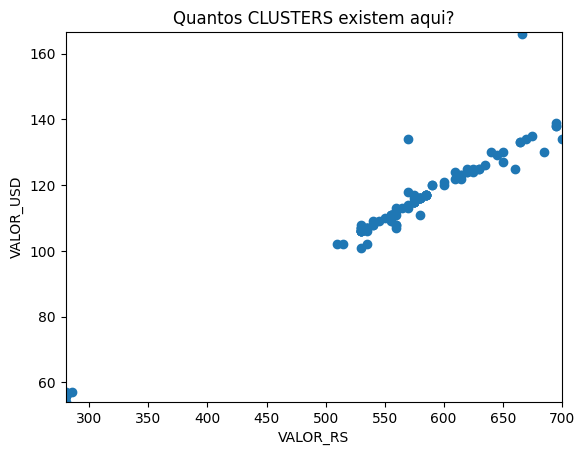

In [745]:
plt.scatter(x=dados['VALOR_RS'], y=dados['VALOR_USD'])
plt.xlim(280 , 700) #range do eixo x
plt.ylim(54.14, 166.51) #range do eixo y
plt.xlabel('VALOR_RS')
plt.ylabel('VALOR_USD')
plt.title('Quantos CLUSTERS existem aqui?')
plt.show()

In [746]:
distancias = {}

for k in range(1, 25):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(dados[['MODELO_Necessaire','MODELO_Nuna', 'MODELO_Wallow','MES','ZiPER','FRETE']])
  distancias[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

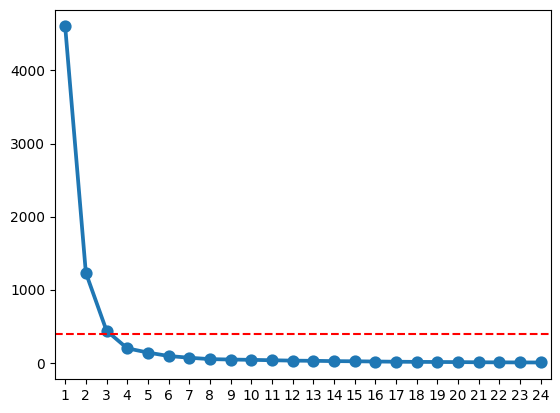

In [747]:
sns.pointplot(x = list(distancias.keys()), y = list(distancias.values()))
plt.axhline(y =400, color = 'red', linestyle = '--')
plt.show()

In [748]:
kmeans = KMeans(n_clusters = 3, init = 'random')
pred_y = kmeans.fit_predict(dados[['VALOR_RS', 'VALOR_USD']])
kmeans_clusters = kmeans.labels_
kmeans_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1], dtype=int32)

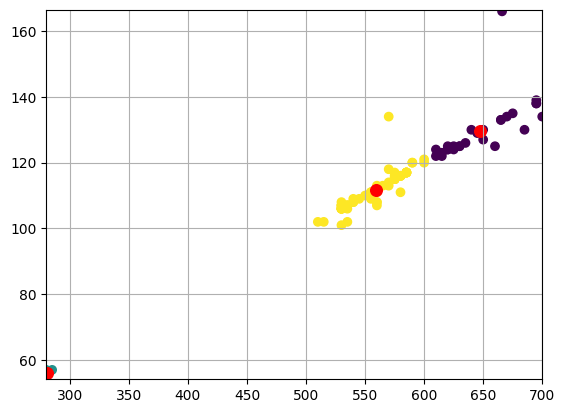

In [749]:
plt.scatter(x=dados['VALOR_RS'], y=dados['VALOR_USD'], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(280 , 700) #range do eixo x
plt.ylim(54.14, 166.51) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [750]:
centroides = kmeans.cluster_centers_
centroides

array([[647.35714286, 129.75      ],
       [280.83333333,  56.        ],
       [558.89705882, 111.83823529]])

In [751]:
from scipy.spatial import distance

In [752]:
def calcular_distancia_euclidiana(centroides,nova_amostra):
  lista_dist = []
  for i in range(len(centroides)):
    a = centroides[i]
    b = nova_amostra[0]
    lista_dist.append(distance.euclidean(a, b))
  menor_dist = min(lista_dist)
  grupo = lista_dist.index(menor_dist)
  return (grupo)

In [753]:
dados_loja1 = {'REAL':340,'DOLAR':72}

df = pd.DataFrame(data = dados_loja1,index=[0])

grupo = calcular_distancia_euclidiana(centroides,df.values)
print(f"A loja pertence ao grupo {grupo}")

A loja pertence ao grupo 1
